In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [103]:
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from sklearn.preprocessing import scale
# style.use('fivethirtyeight')

In [104]:
df = pd.read_csv('TVSMOTOR.NS.csv',parse_dates=True,index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,655.000000,655.0,628.049988,637.250000,636.005615,1024992.0
2018-02-22,637.099976,642.5,625.150024,631.400024,630.167114,1832814.0
2018-02-23,634.900024,670.0,634.799988,667.849976,666.545837,1229159.0
2018-02-26,668.500000,686.0,667.000000,680.849976,679.520447,898086.0


In [105]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-30,529.299988,529.299988,511.149994,513.500000,513.500000,2219226.0
2018-07-31,514.000000,518.950012,507.000000,516.599976,516.599976,1458118.0
2018-08-01,518.000000,523.000000,508.600006,512.450012,512.450012,3754297.0
2018-08-02,516.000000,518.400024,508.000000,512.349976,512.349976,874705.0
2018-08-03,516.900024,521.000000,514.849976,520.349976,520.349976,1108636.0
2018-08-06,524.000000,532.700012,514.299988,527.799988,527.799988,5350621.0
2018-08-07,534.900024,561.250000,518.000000,549.000000,549.000000,11653003.0
2018-08-08,543.000000,543.000000,528.549988,532.799988,532.799988,2573080.0
2018-08-09,534.000000,542.000000,528.799988,538.450012,538.450012,1089845.0


In [106]:
df = df[['Open','High','Low','Close']]
df.head()

,Open,High,Low,Close
Date,,,,
2018-02-20,NaN,NaN,NaN,NaN
2018-02-21,655.000000,655.0,628.049988,637.250000
2018-02-22,637.099976,642.5,625.150024,631.400024
2018-02-23,634.900024,670.0,634.799988,667.849976
2018-02-26,668.500000,686.0,667.000000,680.849976


In [107]:
df.dropna(inplace=True)

In [108]:
forecast_col = 'Close'

In [109]:
df.fillna(value=-99999, inplace=True)

In [110]:
forecast_out = int(math.ceil(0.1 * len(df)))
forecast_out

13

In [111]:
df['label'] = df[forecast_col].shift(forecast_out)

In [112]:
X = np.array(df.drop(['label'], 1))
# X = scale(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  # Don't cheat - fit only on training data
X = scaler.transform(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]


In [113]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)  # Don't cheat - fit only on training data
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) 

In [114]:
df.dropna(inplace=True)

y = np.array(df['label'])


In [115]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [155]:
clf = RandomForestRegressor(n_estimators=5)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9930521128448861


In [156]:
# clf = LinearRegression(n_jobs=-1)
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print(confidence)

In [157]:
# clf = svm.SVR(kernel='linear')
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print(confidence)

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
scores = cross_val_score(clf,X_train, y_train,cv=10,scoring='mean_squared_error')
scores

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\HP\Anaconda3\lib\site-packages\skle

array([-40.53588394, -66.37210989,  -4.36572513,  -2.90857524,
       -20.43752785,  -6.89943502, -16.84136142, -17.74601721,
        -9.45886877,  -9.48261008])

In [160]:
mse_scores = - scores
mse_scores

array([40.53588394, 66.37210989,  4.36572513,  2.90857524, 20.43752785,
        6.89943502, 16.84136142, 17.74601721,  9.45886877,  9.48261008])

In [161]:
mse_scores.mean()

19.50481145580258

In [162]:
# forecast_set = clf.predict(X_lately)
# df['Forecast'] = np.nan
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan


In [163]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


In [164]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [171]:
df1yr = df['Close'].resample('H').mean()
print((df1yr))

Date
2018-03-13 00:00:00    641.599976
2018-03-13 01:00:00           NaN
2018-03-13 02:00:00           NaN
2018-03-13 03:00:00           NaN
2018-03-13 04:00:00           NaN
2018-03-13 05:00:00           NaN
2018-03-13 06:00:00           NaN
2018-03-13 07:00:00           NaN
2018-03-13 08:00:00           NaN
2018-03-13 09:00:00           NaN
2018-03-13 10:00:00           NaN
2018-03-13 11:00:00           NaN
2018-03-13 12:00:00           NaN
2018-03-13 13:00:00           NaN
2018-03-13 14:00:00           NaN
2018-03-13 15:00:00           NaN
2018-03-13 16:00:00           NaN
2018-03-13 17:00:00           NaN
2018-03-13 18:00:00           NaN
2018-03-13 19:00:00           NaN
2018-03-13 20:00:00           NaN
2018-03-13 21:00:00           NaN
2018-03-13 22:00:00           NaN
2018-03-13 23:00:00           NaN
2018-03-14 00:00:00    642.450012
2018-03-14 01:00:00           NaN
2018-03-14 02:00:00           NaN
2018-03-14 03:00:00           NaN
2018-03-14 04:00:00           NaN
2018-03-1

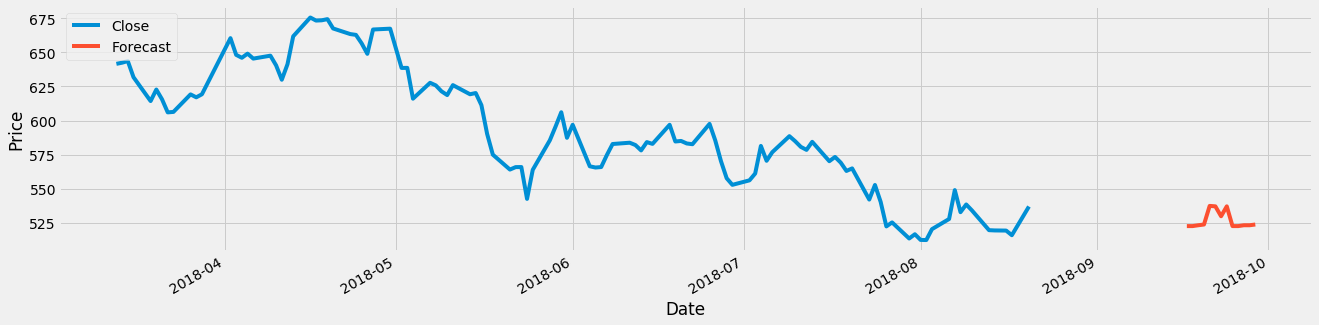

In [165]:
plt.figure(figsize=(20,5))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [127]:
X_lately

array([[-1.7557152 , -1.81529339, -1.73024344, -1.84864139],
       [-1.79800803, -1.91197384, -1.74298275, -1.85076526],
       [-1.77897575, -1.85732859, -1.59754421, -1.68091692],
       [-1.62883671, -1.61142244, -1.60922154, -1.52274539],
       [-1.39834029, -1.01137026, -1.53066297, -1.07264704],
       [-1.22705484, -1.39494143, -1.30666585, -1.41659018],
       [-1.41737257, -1.41595903, -1.30135785, -1.29663428],
       [-1.37507974, -1.50002942, -1.27481788, -1.38899008],
       [-1.52310464, -1.68813718, -1.53066297, -1.6968402 ],
       [-1.77474748, -1.79112265, -1.61346819, -1.70108539],
       [-1.75148566, -1.81634402, -1.60497489, -1.70320926],
       [-1.71342237, -1.83631099, -1.60709758, -1.77539404],
       [-1.7557152 , -1.43277285, -1.56888027, -1.32848085]])

In [128]:
df['Forecast'][-13:]

Date
2018-08-21 05:30:00    522.719989
2018-08-22 05:30:00    522.719989
2018-08-23 05:30:00    524.489984
2018-08-24 05:30:00    524.754987
2018-08-25 05:30:00    545.959992
2018-08-26 05:30:00    533.369983
2018-08-27 05:30:00    533.369983
2018-08-28 05:30:00    533.369983
2018-08-29 05:30:00    527.034986
2018-08-30 05:30:00    524.489984
2018-08-31 05:30:00    524.489984
2018-09-01 05:30:00    524.489984
2018-09-02 05:30:00    527.969983
Name: Forecast, dtype: float64

In [129]:
df.tail(14)

,Open,High,Low,Close,label,Forecast
Date,,,,,,
2018-08-20 00:00:00,518.0,541.200012,516.200012,536.950012,516.599976,NaN
2018-08-21 05:30:00,NaN,NaN,NaN,NaN,NaN,522.719989
2018-08-22 05:30:00,NaN,NaN,NaN,NaN,NaN,522.719989
2018-08-23 05:30:00,NaN,NaN,NaN,NaN,NaN,524.489984
2018-08-24 05:30:00,NaN,NaN,NaN,NaN,NaN,524.754987
2018-08-25 05:30:00,NaN,NaN,NaN,NaN,NaN,545.959992
2018-08-26 05:30:00,NaN,NaN,NaN,NaN,NaN,533.369983
2018-08-27 05:30:00,NaN,NaN,NaN,NaN,NaN,533.369983
2018-08-28 05:30:00,NaN,NaN,NaN,NaN,NaN,533.369983


In [130]:
clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [131]:
clf.score(X_test,y_test)

0.9957663156386231

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
prds = clf.predict(X_test)


In [134]:
loss = mean_squared_error(y_test,prds)
loss

6.547277069748932

In [135]:
import math

In [136]:
rmse = math.sqrt(loss)
rmse

2.5587647546714667

In [137]:
import seaborn as sns

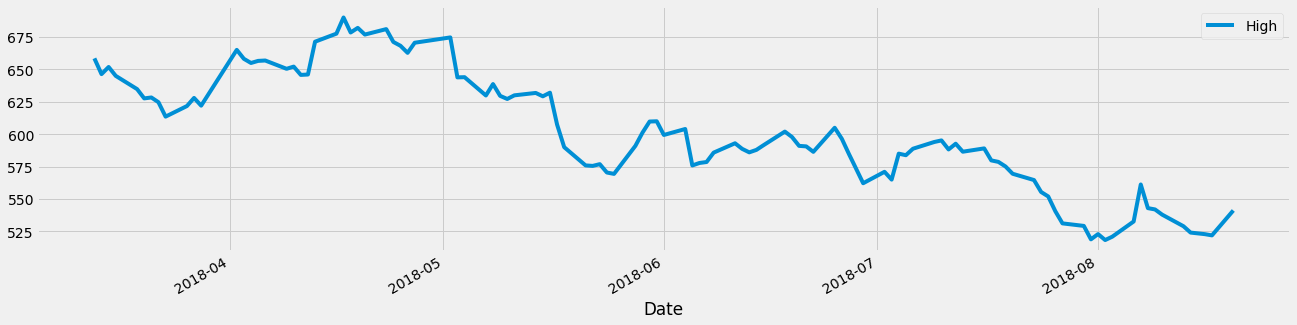

In [138]:
plt.figure(figsize=(20,5))
# plt.plot(df['Close'].index,df['Close'].values)
df['High'].plot()
plt.legend()
plt.show()

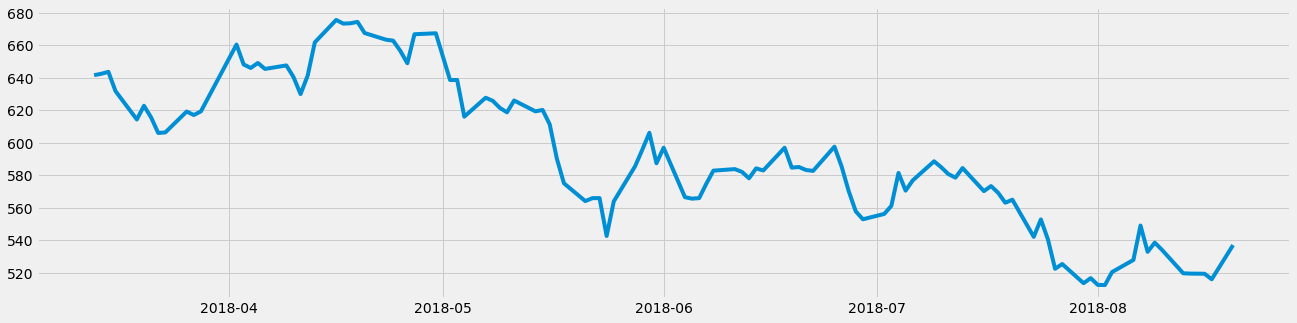

In [139]:
plt.figure(figsize=(20,5))
plt.plot(df['Close'].index,df['Close'].values)
plt.show()

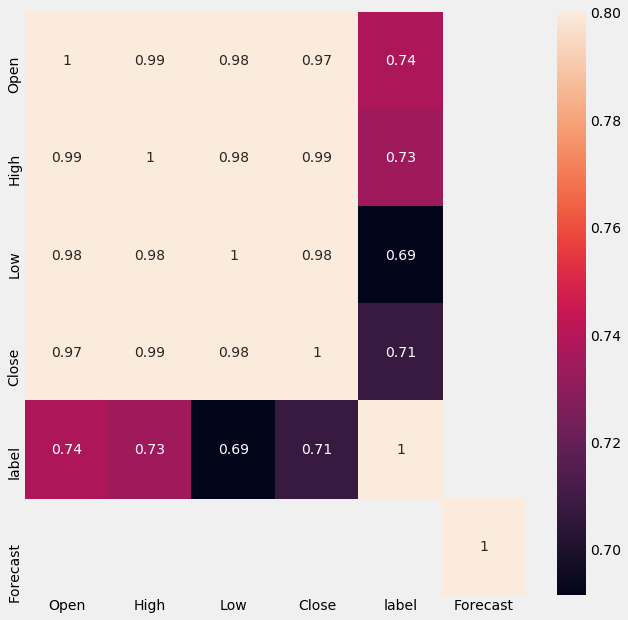

In [140]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, annot=True);


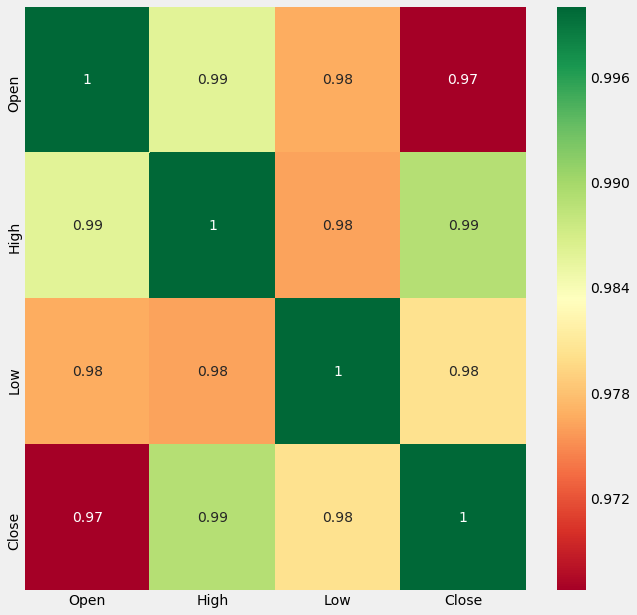

In [141]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["Close"])>0.75]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [142]:
df.isnull().any().sum()

6

In [143]:
corr = df.corr()
corr.sort_values(['Close'], ascending = False, inplace = True)
print(corr.Close)


Close       1.000000
High        0.989067
Low         0.980341
Open        0.966751
label       0.707645
Forecast         NaN
Name: Close, dtype: float64
